<a href="https://colab.research.google.com/github/TheFckReal/ML-attestation/blob/main/ml_attestation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вопросы

## 1. Объясните, как вычисляется качество модели с задачей классификации: назовите основные и вторичные метрики, приведите пример

Качество модели с задачей классификации фундаментально основано на матрице ошибок, представляющей из себя следующее:

 \\
  \begin{array}{|c|c|c|c|c|c|c|c|}\hline\\ \\
  \mathcal{} & \mathcal{Positive} & \mathcal{Negative} \\ \hline\\ \\
  Positive & TP & FN  \\ \hline\\ \\
  Negative & FP & TN
 \\ \hline
  \end{array}

И имеет следующие первичные метрики:

$Accuracy (достоверность) = \frac{TP + TN} {FP + FN + TP + TN} = \frac {TP + TN} {P + N}$ и обозначает долю верных ответов среди всех ответов модели.

$Precision (точность) = \frac{TP} {TP + FP}$ и показывает долю ложноположительных срабатываний. Таким образом, при увеличении точности наша модель лучше различает положительный и отрицательный класс.

$Recall (полнота) = \frac {TP} {TP + FN}$ и показывает долю ложноотрицательных срабатываний. При увеличении этой метрики модель лучше в целом определяет положительный класс.

Вторичными же метриками, то есть основанными на первичных, можно назвать F-меру (среднее гармоническое точности и полноты с коэффициентом, отвечающим за важность точности) и ROC-AUC (метрика, показывающая насколько лучше наша модель в сравнении со случайной моделью).

Пример:

Пусть у нас будет модель, предсказывающая пьяный водитель или нет (например, по его внешнему виду или поведению).
Метка **1** - водитель пьян (положительный класс).
Метка **0** - водитель трезв (отрицательный класс).

Всего 6 обьектов, имеющих метку **0**, и 4, имеющих метку **1**.

И пусть матрица ошибок нашей модели имеет следующий вид

 \\
  \begin{array}{|c|c|c|c|c|c|c|c|}\hline\\ \\
  \mathcal{} & \mathcal{Positive} & \mathcal{Negative} \\ \hline\\ \\
  Positive & 3 & 1  \\ \hline\\ \\
  Negative & 2 & 4
 \\ \hline
  \end{array}

Тогда метрики качества будут следующие:

Accuracy = $\frac{7} {10}$ = 0.7

Precision = $\frac{3} {3 + 2}$ = 0.6

Recall = $\frac{3} {3 + 1}$ = 0.75

F1-мера (то есть β = 1) = $\frac{2} {1 / Precision + 1 / Recall}$ = $\frac{2} {1 / 0.6 + 1 / 0.75}$ $≃$ 0.67

И, к примеру, в рамках нашей задачи нам важно явно опознавать пьяных водителей, так как ошибочное отнесение пьяного водителя к трезвому может стоить жизни. То есть нам нужно уменьшить кол-во ложноотрицательных срабатываний - в таком случае нужно обратить внимание на метрику Recall.

## 2. Что такое тестовый набор данных (test set) и для чего он нужен?

Тестовый набор данных - это выборка, по которой оценивается качество **обученной модели**. Соответственно, она необходима для оценки качества модели с учётом её обобщающей способности.

## 3. В чем разница между параметром модели и гиперпараметром алгоритма обучения? Приведите примеры.

Параметром модели является математический обьект (число, вектор), значение которого модель подбирает в ходе решения оптимизационной задачи (то бишь обучения).

В то же время гиперпараметр - это параметр, который определяет ход обучения модели, т.е. задаётся до этого процесса. И задаётся он, как правило, человеком. Таким образом гиперпараметр может повлиять на все аспекты обучения модели: темп, оптимум и т.п.

Примеры:

В линейной модели параметром является вектор коэффициентов у признаков. При этом гиперпараметрами являются: кол-во итераций, tol (разница изменения) при градиентном спуске. При L1, L2 регуляризации параметр α, отвечающий за силу регуляризации, является также гиперпараметром.

В решающих деревьях параметрами являются разделяющие значения в предикторах, а гиперпараметром - длина дерева, минимальное кол-во элементов в листе и т.п.

# Соревнование на Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic_test.csv')

## 1. Знакомство с данными

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Согласно кагглу мы имеем:

Pclass - социально-экономический класс пассажиров, имеющий 3 значения:

1 - высокий

2 - средний

3 - низкий

Sex - пол: male/female

Age - возраст: дробное значение, если меньше года. Если возраст примерный, то значение также имеет дробь.

Sibsp - кол-во братьев/сестёр или супругов у пассажира

Parch - кол-во родителей и детей у пассажира

Ticket - номер билета

Fare - стоимость проезда у пассажиров

Cabin - номер кабины

Embarked - порт посадки:
C = Cherbourg, Q = Queenstown, S = Southampton

Нашим же целевым признаком является **Survived**

Survived - выжил пассажир после крушения "Титаника" или нет: 1 - выжил, 0 - нет.

## EDA

Проверим базовую информацию о данных. Для начала займёмся обучающей выборкой.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В целом датасет достаточно полный, за исключением, разве что, номера кабины.

In [ ]:
round(train.Cabin.count() / train.shape[0], 2)

0.23

23% непропущенных данных - это крайне мало и неинформативно, потому мы избавимся от данного признака.

In [ ]:
train = train.drop('Cabin', axis=1)

Что касательно возраста - на текущем этапе мы можем заменить его на медианное значение, что, хоть и имеет возможность подпортить наши значения, зато сохранит другие важные данные. В любом случае от этого признака можно будем избавиться в будущем.

In [ ]:
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


В признаке Embarked отсутствует всего 2 значения - заменим их на моду.

In [ ]:
embarked_mode = train.Embarked.mode()
train.Embarked = train.Embarked.fillna(embarked_mode[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


С train датасетом мы разобрались. Перейдем к test датасету.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Проведем действия аналогичные предыдущим. Fare также заполним средним.

In [ ]:
test.Age = test.Age.fillna(test.Age.median())
test.Fare = test.Fare.fillna(test.Fare.mean())
test = test.drop('Cabin', axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Перейдем к преобразованию данных.

In [ ]:
def encode_sex(sex):
  if sex == 'male':
    return 1
  else:
    return 0

train.Sex = train.Sex.apply(encode_sex)
test.Sex = test.Sex.apply(encode_sex)

In [ ]:
train = train.astype({'Pclass': 'category','Embarked': 'category', 'Name': 'string', 'Ticket': 'string'})
test = test.astype({'Pclass': 'category', 'Embarked': 'category', 'Name': 'string', 'Ticket': 'string'})

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    string  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    string  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), string(2)
memory usage: 64.8 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    string  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    string  
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(2), float64(2), int64(4), string(2)
memory usage: 27.3 KB


Сделаем PassengerID нашим индексом

In [ ]:
train = train.set_index('PassengerId')

И теперь перейдем к анализу наших данных и их визуализации.

<Axes: >

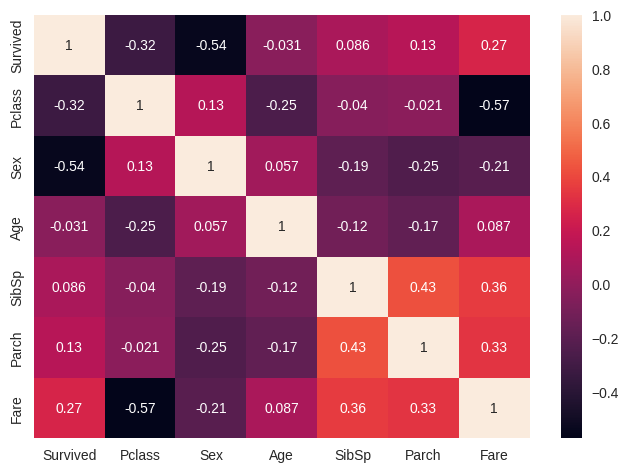

In [ ]:
sns.heatmap(train.drop(['Name', 'Ticket', 'Embarked'], axis=1).corr('kendall'), annot=True)

На выживаемость со средней силой линейно влияет пол, в остальных же признаках линейной зависимости нет или практически нет. Потому вероятно взаимосвязь тут нелинейная и модели нужно будет строить соответственно нелинейные.

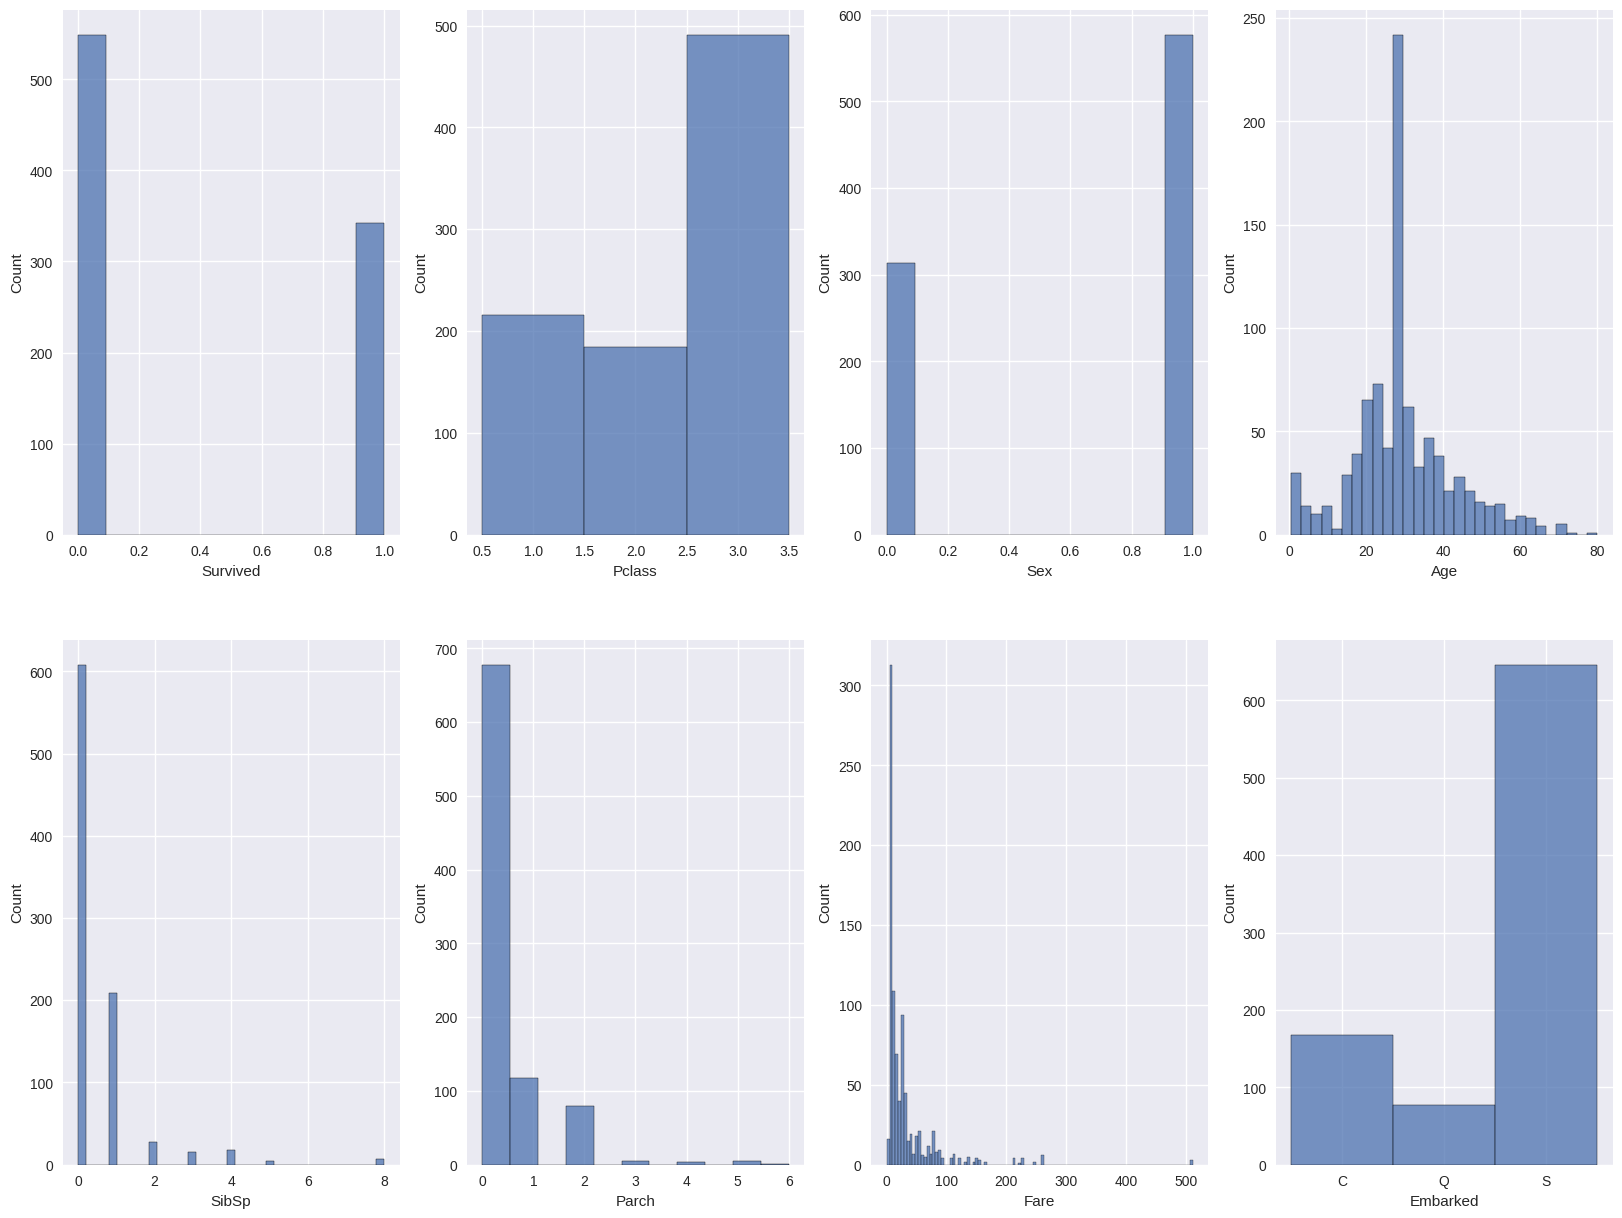

In [ ]:
def hist_draw(data, features, axe, row):
  for i, feature in enumerate(features):
    sns.histplot(data[feature], ax=ax[row, i])

fig, ax = plt.subplots(2, 4, figsize=(20, 15))
hist_draw(train, ['Survived', 'Pclass', 'Sex', 'Age'], ax, 0)
hist_draw(train, ['SibSp', 'Parch', 'Fare', 'Embarked'], ax, 1)
plt.show()

Из графиков видно, что все признаки имеют явно ненормальное распределение (если мы говорим именно про числовые).

В то же время можно заметить, что погибло пассажиров не сильно больше, чем выжило.

Пассажиры, имеющие высокий достаток, превалируют над остальными.

Мужчин на корабле было заметно больше, чем женщин, а наиболее встречаемый возраст пассажиров - около 30 лет.

SibSp и Parch чаще всего около нуля - было много тех или иных одиночек.

Стоимость билетов имеет явный пик, а также заметный выброс - кто-то приобрел билет за 500 фунтов.

В то же время признаки имя и номер билета не несут никакой интепретации.

Отобразим теперь boxplot графики.

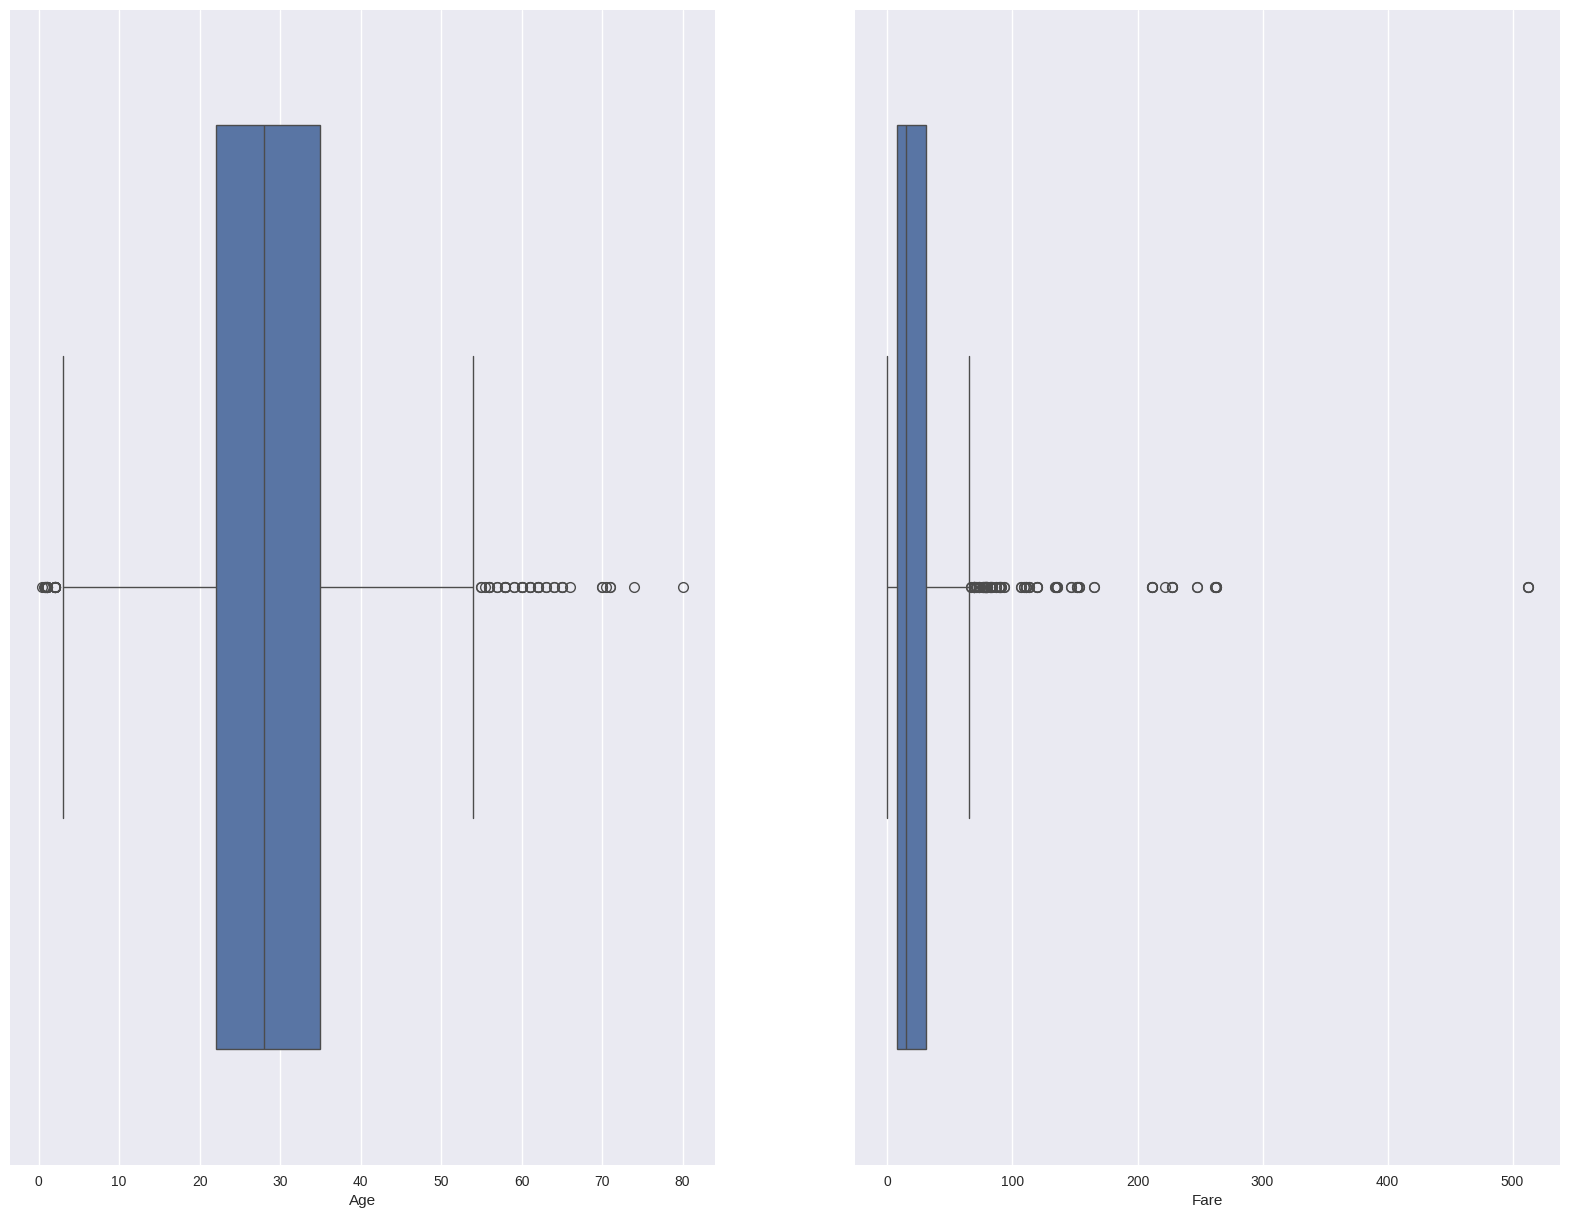

In [ ]:
def boxplot_draw(data, features, axe):
  for i, feature in enumerate(features):
    sns.boxplot(x=data[feature], ax=ax[i])

fig, ax = plt.subplots(1, 2, figsize=(20, 15))
boxplot_draw(train, ['Age', 'Fare'], ax)
plt.show()

В целом заметны выбросы в рамках конкретных наборов данных, но ничего из ряда вон выходящего не наблюдается. Только лишь стоимость билета за 500 фунтов стерлингов явно выбивается из общей картины. Проверим, корректны ли данные.

In [ ]:
train.query(f'Fare == {train.Fare.max()}')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,C
738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,C


На энциклопедии о "Титанике" можно найти всех трёх личностей - они действительно приобрели самые дорогие билеты, потому данные корректны.

Последним важным аспектом будет проверка частот положительного и отрицательного класса - это необходимо, так как для моделей классификации может быть важно, что классы несбалансированы.

In [ ]:
train.Survived.value_counts(normalize=True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


*Перевес* имеется, хоть и не столь значимый. От идеального 50/50 нас отделяют лишь ~10% наблюдений. Что также можно заметить на гистограмме выше.

## Отбор признаков

Имена и номера билетов абсолютно неинформативны по той причине, что это искусственные данные и они не могут иметь влияния на возможность выживания человека. Аналогично можно сказать и про порт отправления, так как на момент крушения все были в открытом океане. Отбросим данные признаки для всех датасетов (мы всё равно не будем делать по ним предсказания).

In [ ]:
train = train.drop(['Name', 'Ticket', 'Embarked'], axis=1)
test = test.drop(['Name', 'Ticket', 'Embarked'], axis=1)

In [ ]:
train.describe()

,Survived,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Произведём one-hot кодирование класса пассажиров.

In [ ]:
train = pd.get_dummies(train, columns=['Pclass'], drop_first=True)
test = pd.get_dummies(test, columns=['Pclass'], drop_first=True)

В целом отбор признаков у нас будет ещё происходить при построении нашей модели.

## Моделирование

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

train_X, val_X, train_y, val_y = train_test_split(train.drop('Survived', axis=1), train.Survived, test_size=0.2, random_state=42)

Будем строить несколько моделей: логистическую регрессию на основе полиномиальных признаков, случайный лес и лес, построенный на основе градиентного бустинга. Выбор этих моделей обусловлен тем, что при помощи корреляции линейные зависимости не были найдены и нам необходимо искать нелинейные.

### Разведочное моделирование

Для логистической регрессии приведём все признаки к единому масштабу.

In [ ]:
std_scaler = StandardScaler()
train_std_X = std_scaler.fit_transform(train_X)
val_std_X = std_scaler.transform(val_X)

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
train_X_poly = poly_features.fit_transform(train_std_X)
val_X_poly = poly_features.transform(val_std_X)

log_reg = LogisticRegression(penalty='l2', max_iter=500, random_state=42)
log_reg.fit(train_X_poly, train_y)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
def print_metrics(model, train_X, train_y, val_X, val_y, model_name):
  print(f'Классификация для обучающей выборки ({model_name})')
  print(classification_report(train_y, model.predict(train_X)))
  print(f'Классификация для валидационной выборки ({model_name})')
  print(classification_report(val_y, model.predict(val_X)))


print_metrics(log_reg, train_X_poly, train_y, val_X_poly, val_y, 'логистическая регрессия')


Классификация для обучающей выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       444
           1       0.84      0.71      0.77       268

    accuracy                           0.84       712
   macro avg       0.84      0.81      0.82       712
weighted avg       0.84      0.84      0.84       712

Классификация для валидационной выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Мы получаем неплохие результаты - 0.81 accuracy на валидационной выборке при условии, что наша модель не сильно переобучена. Однако логистическая регрессия не очень хорошо отличает наших пострадавших от выживших - recall всего 0.69.

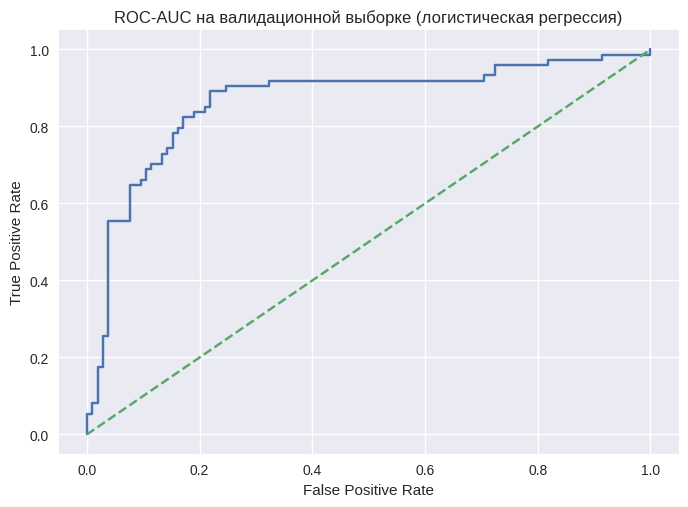

In [ ]:
def draw_roc_curve(model, val_X, val_y, model_name):
  fpr, tpr, thrs = roc_curve(val_y, model.predict_proba(val_X)[:, 1])
  plt.plot(fpr,tpr)
  sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title(f'ROC-AUC на валидационной выборке ({model_name})')
  plt.show()

draw_roc_curve(log_reg, val_X_poly, val_y, 'логистическая регрессия')

In [ ]:
print('AUC на валидационной выборке: ', round(roc_auc_score(val_y, log_reg.predict_proba(val_X_poly)[:, 1]), 2))

AUC на валидационной выборке:  0.86


ROC-AUC выглядит прилично у нашего предсказателя.

Перейдём к случайному лесу.

In [ ]:
random_forest = RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=100, criterion='entropy', random_state=42)
random_forest.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=42)

In [ ]:
print_metrics(random_forest, train_X, train_y, val_X, val_y, 'случайный лес')

Классификация для обучающей выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       444
           1       0.94      0.55      0.69       268

    accuracy                           0.82       712
   macro avg       0.86      0.76      0.78       712
weighted avg       0.84      0.82      0.80       712

Классификация для валидационной выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       105
           1       0.86      0.57      0.68        74

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.78      0.77       179



Точность на 0,03 меньше, чем у логистической регрессии. Остальные метрики также хуже, чем у логистической регрессии.

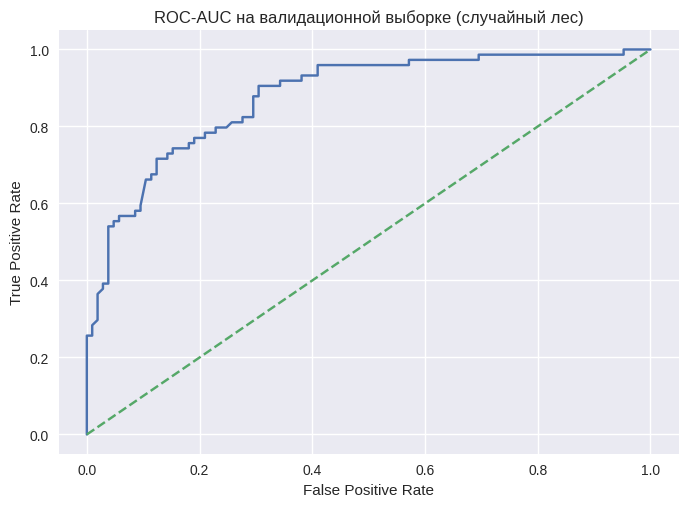

In [ ]:
draw_roc_curve(random_forest, val_X, val_y, 'случайный лес')

In [ ]:
print('AUC на валидационной выборке: ', round(roc_auc_score(val_y, random_forest.predict_proba(val_X)[:, 1]), 2))

AUC на валидационной выборке:  0.88


AUC-метрика получше, чем у логистической регрессии, однако есть в целом сомнения, что SibSp и Parch как-либо значимо влияет на метрики модели. Для начала попробуем сократить количество признаков методом PCA на модели случайного леса и логистической регрессии.

### Анализ необходимости и возможности сокращения размерности

#### РСА

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
pca.fit(train_std_X)
random_forest.fit(pca.transform(train_std_X), train_y)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=42)

In [ ]:
def print_metrics(model, train_X, train_y, val_X, val_y, model_name):
  print(f'Классификация для обучающей выборки ({model_name})')
  print(classification_report(train_y, model.predict(train_X)))
  print(f'Классификация для валидационной выборки ({model_name})')
  print(classification_report(val_y, model.predict(val_X)))

print_metrics(random_forest, pca.transform(train_std_X), train_y, pca.transform(val_std_X), val_y, 'случайный лес')

Классификация для обучающей выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       444
           1       0.82      0.52      0.63       268

    accuracy                           0.78       712
   macro avg       0.79      0.72      0.74       712
weighted avg       0.78      0.78      0.76       712

Классификация для валидационной выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       105
           1       0.84      0.50      0.63        74

    accuracy                           0.75       179
   macro avg       0.78      0.72      0.72       179
weighted avg       0.77      0.75      0.74       179



In [ ]:
log_reg_pca = LogisticRegression(random_state=42)
log_reg_pca.fit(pca.transform(train_std_X), train_y)

print_metrics(log_reg_pca, pca.transform(train_std_X), train_y, pca.transform(val_std_X), val_y, 'логистическая регрессия')

Классификация для обучающей выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       444
           1       0.71      0.53      0.61       268

    accuracy                           0.74       712
   macro avg       0.73      0.70      0.71       712
weighted avg       0.74      0.74      0.73       712

Классификация для валидационной выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       105
           1       0.72      0.51      0.60        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.69       179
weighted avg       0.72      0.72      0.70       179



Результаты удручающие (все метрики ухудшились) по той причине, что либо линейное сокращение размерности пространства невозможно (что в целом логично с учетом дискретности нашего пространства и всё того же отсутствия корреляции), либо же признаки переобучения (обучающая метрика лучше тестовой) лишь случайность. Попробуем напрямую удалить два признака.

#### Удаление признаков

In [ ]:
train_cutted_X = train_X.drop(['SibSp', 'Parch'], axis=1)
val_cutted_X = val_X.drop(['SibSp', 'Parch'], axis=1)

random_forest.fit(train_cutted_X, train_y)

print_metrics(random_forest, train_cutted_X, train_y, val_cutted_X, val_y, 'случайный лес')

Классификация для обучающей выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       444
           1       0.90      0.59      0.71       268

    accuracy                           0.82       712
   macro avg       0.85      0.78      0.79       712
weighted avg       0.83      0.82      0.81       712

Классификация для валидационной выборки (случайный лес)
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       105
           1       0.84      0.57      0.68        74

    accuracy                           0.78       179
   macro avg       0.80      0.75      0.75       179
weighted avg       0.79      0.78      0.77       179



Accuracy стала лучше, чем раньше, но все еще хуже, чем у логистической регрессии выше. И все же модель улучшила свои показатели.

In [ ]:
poly_features.fit(train_cutted_X)
log_reg.max_iter = 1000
log_reg.fit(poly_features.transform(train_cutted_X), train_y)
print_metrics(log_reg, poly_features.transform(train_cutted_X), train_y, poly_features.transform(val_cutted_X), val_y, 'логистическая регрессия')

Классификация для обучающей выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       444
           1       0.79      0.69      0.74       268

    accuracy                           0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712

Классификация для валидационной выборки (логистическая регрессия)
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.75      0.66      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



Изменение аналогично незначительно, потому дальнейшего отбора признаков не будет. Оставим удаленными только их - разница между метриками обучающей и валидационной выборками сократилась, хоть в линейной регрессии незначительно ухудшилась достоверность. Однако теперь обучение занимает чуть меньше времени.

In [ ]:
train_X = train_cutted_X
val_X = val_cutted_X

### Оставшееся моделирование

In [ ]:
catboost_classifier = CatBoostClassifier(verbose=False, depth=3, random_state=42)
catboost_classifier.fit(train_X, train_y)
print_metrics(catboost_classifier, train_X, train_y, val_X, val_y, 'CatBoost')

Классификация для обучающей выборки (CatBoost)
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       444
           1       0.88      0.73      0.80       268

    accuracy                           0.86       712
   macro avg       0.87      0.83      0.85       712
weighted avg       0.86      0.86      0.86       712

Классификация для валидационной выборки (CatBoost)
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



Градиентный бустинг по accuracy лучше лишь на 0,01 (незначительно), но точность у положительного класса увеличилась на 0,03 по сравнению с первой логистической регрессией.

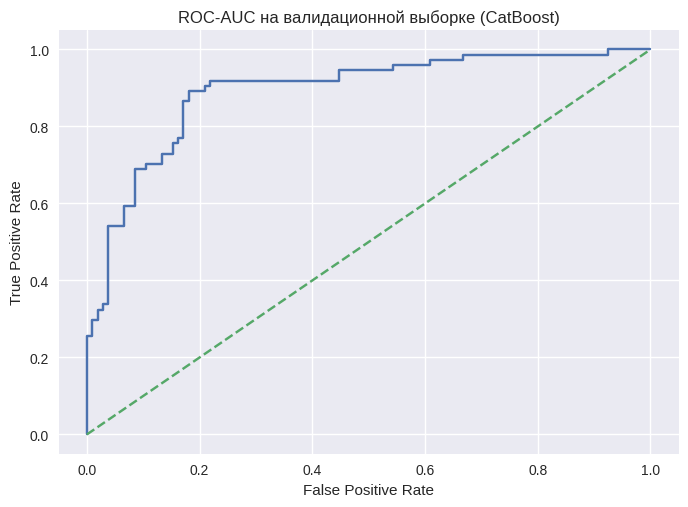

In [ ]:
draw_roc_curve(catboost_classifier, val_X, val_y, 'CatBoost')

In [ ]:
round(roc_auc_score(val_y, catboost_classifier.predict_proba(val_X)[:, 1]), 2)

0.89

## Предсказание + итоги

Градиентный бустинг показал себя чуть лучше, чем остальные, однако весь прирост заключается в долях сотых. И всё же оставим именно его - у нас нет задачи найти наиболее простую модель, а нужно найти наиболее точную.

In [ ]:
predict_df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': catboost_classifier.predict(test)})
#predict_df.to_csv('submission.csv', index=False)

Загрузив решение на Kaggle получаем следующее:

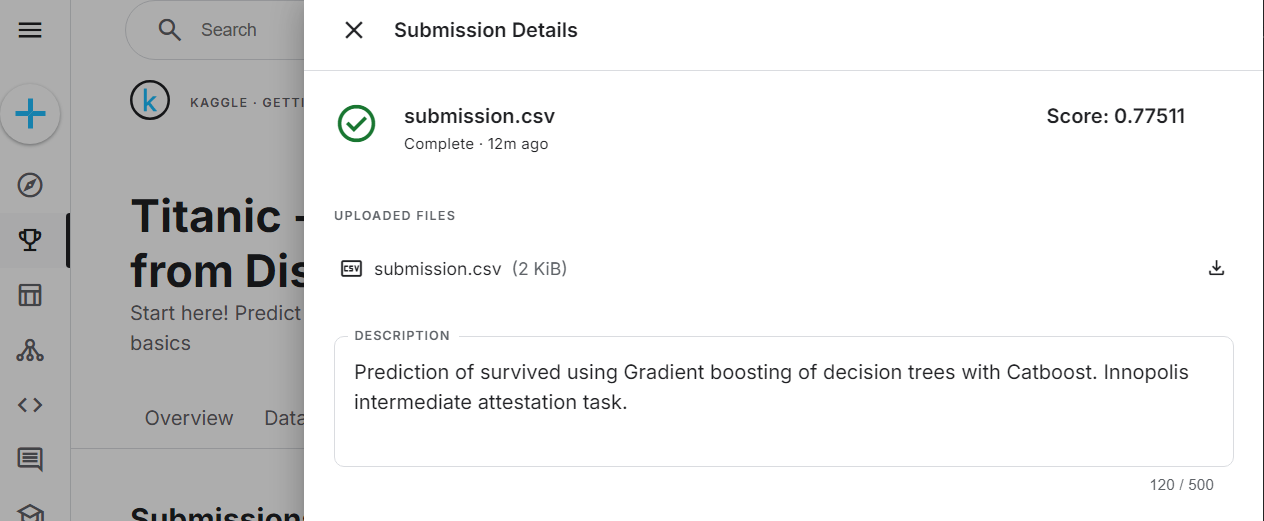

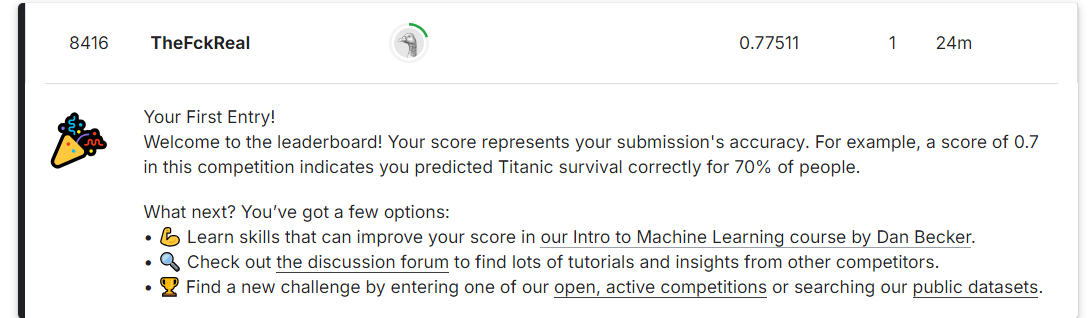